In [1]:
import os, sys
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd
import colorcet as cc
import cv2
import skimage
import scipy.ndimage, scipy.stats

## SNR comparison

In [2]:
conditions = ['Fluorescence', 'IMC_1μm', 'IMC_500nm', 'IMC_300nm']
data_dir_dict = {
    'Fluorescence': '/mnt/central_nas/users/ychian/Exp/202503_IMC_inten_encoding/20250415_eGFP_in_vivo_RCA/processed/dataframes/G4_40x_2_focus_amp_df.csv',
    'IMC_1μm': '/mnt/central_nas/users/ychian/Exp/202503_IMC_inten_encoding/20250426_eGFP_in_vivo_RCA/tif/dataframes/ROI_002_amp_df.csv',
    'IMC_500nm': '/mnt/central_nas/users/ychian/Exp/202503_IMC_inten_encoding/20250426_eGFP_in_vivo_RCA/20250422_QH_eGFP_RCA_in_vivo_IMC_decov/psf_500_-5db_i7/dataframes/ROI_012_deconvoluted_amp_df.csv',
    'IMC_300nm': '/mnt/central_nas/users/ychian/Exp/202503_IMC_inten_encoding/20250426_eGFP_in_vivo_RCA/20250422_QH_eGFP_RCA_in_vivo_IMC_decov/psf_300_-10db_i7/dataframes/ROI_018_deconvoluted_amp_df.csv'
}

amp_df_dict = {}
for condition in conditions:
    amp_df = pd.read_csv(data_dir_dict[condition])
    amp_df['condition'] = condition
    amp_df_dict[condition] = amp_df
amp_df = pd.concat(amp_df_dict.values())
amp_df

,label,y,x,area,mean_intensity,total_intensity,cyto_label,SNR,condition,mean_intensity_488,total_intensity_488,mean_intensity_555,total_intensity_555,SNR_555,SNR_488
0,1,106.277778,1378.111111,18.0,1256.555556,22618.0,0.0,10.652912,Fluorescence,NaN,NaN,NaN,NaN,NaN,NaN
1,2,152.750000,74.950000,20.0,1275.200000,25504.0,0.0,6.978938,Fluorescence,NaN,NaN,NaN,NaN,NaN,NaN
2,3,175.500000,1014.000000,6.0,1000.500000,6003.0,0.0,4.700832,Fluorescence,NaN,NaN,NaN,NaN,NaN,NaN
3,4,187.500000,963.500000,4.0,1333.750000,5335.0,1.0,6.991023,Fluorescence,NaN,NaN,NaN,NaN,NaN,NaN
4,5,189.800000,970.800000,15.0,1491.800000,22377.0,1.0,8.809882,Fluorescence,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,594.578947,71.105263,19.0,NaN,NaN,NaN,NaN,IMC_300nm,22.060162,419.143082,14.284068,271.397292,26.126043,29.080178
840,841,595.000000,158.000000,9.0,NaN,NaN,NaN,NaN,IMC_300nm,1.951894,17.567050,6.962635,62.663711,13.287271,0.469336
841,842,600.000000,130.500000,12.0,NaN,NaN,NaN,NaN,IMC_300nm,14.490633,173.887600,14.587308,175.047691,15.047333,11.032043
842,843,601.600000,374.600000,15.0,NaN,NaN,NaN,NaN,IMC_300nm,23.487944,352.319160,16.393258,245.898867,6.798095,1.672803


median
11.504935568950298
9.433515548706056
6.503228664398193
12.454824854735467
7.100128350852279
16.34720550541996
10.142610253883806
mean
13.017063037257309
9.889871576892006
7.1231546072165175
13.429020769546003
8.69808798601723
19.32305659256359
12.121738942733234


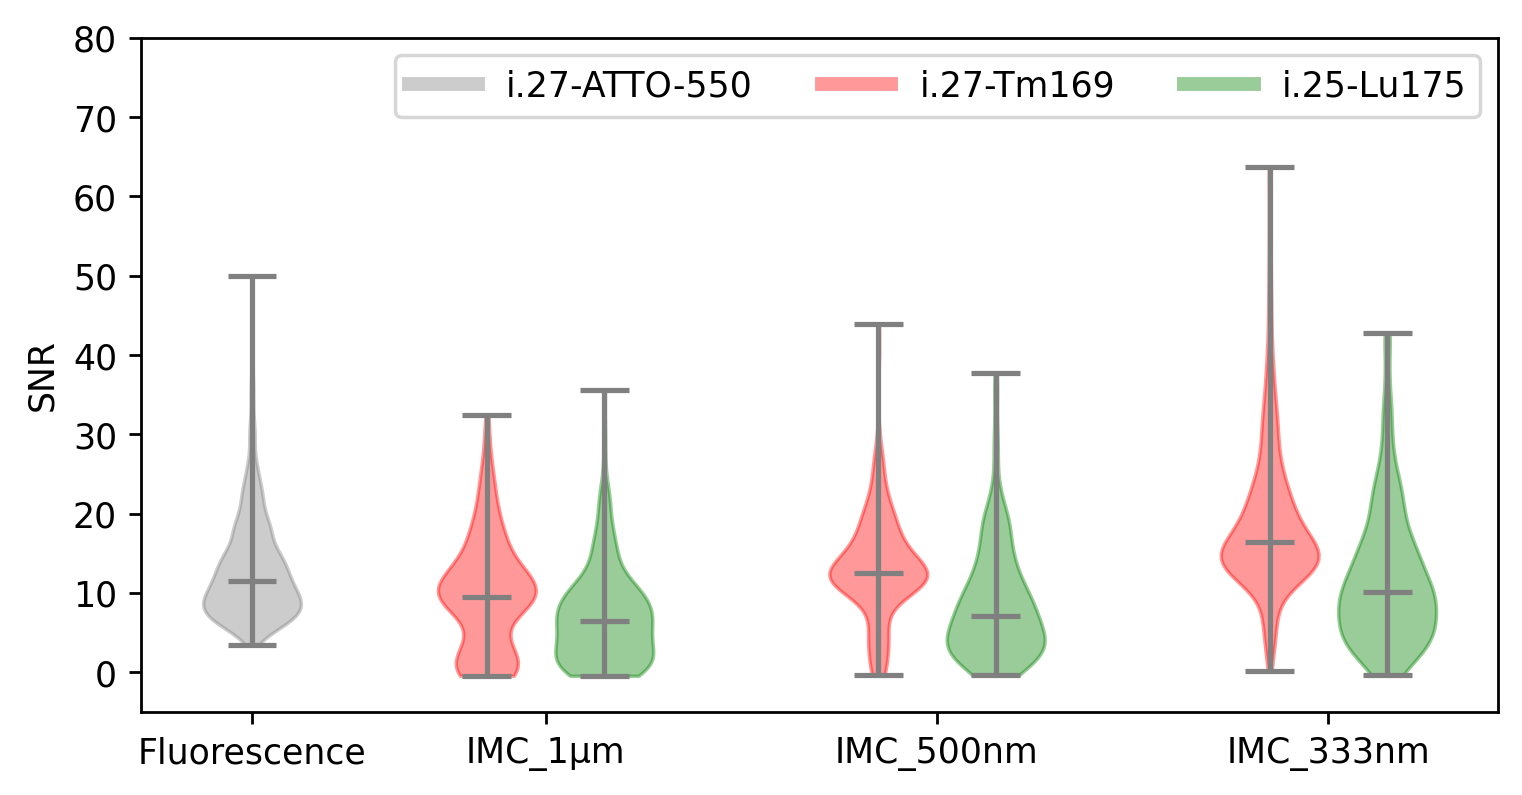

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3.5), dpi=250)
# Adjusted x positions for paired violins
plots = ax.violinplot(
    [amp_df[amp_df['condition'] == 'Fluorescence']['SNR'].values,
     amp_df[amp_df['condition'] == 'IMC_1μm']['SNR_555'].values,
     amp_df[amp_df['condition'] == 'IMC_1μm']['SNR_488'].values,
     amp_df[amp_df['condition'] == 'IMC_500nm']['SNR_555'].values,
     amp_df[amp_df['condition'] == 'IMC_500nm']['SNR_488'].values,
     amp_df[amp_df['condition'] == 'IMC_300nm']['SNR_555'].values,
     amp_df[amp_df['condition'] == 'IMC_300nm']['SNR_488'].values],
    positions=[1, 2.2, 2.8, 4.2, 4.8, 6.2, 6.8],  # Adjusted positions
    showmeans=False, showmedians=True, showextrema=True)

# print median and mean
print('median')
print(amp_df[amp_df['condition'] == 'Fluorescence']['SNR'].median())
print(amp_df[amp_df['condition'] == 'IMC_1μm']['SNR_555'].median())
print(amp_df[amp_df['condition'] == 'IMC_1μm']['SNR_488'].median())
print(amp_df[amp_df['condition'] == 'IMC_500nm']['SNR_555'].median())
print(amp_df[amp_df['condition'] == 'IMC_500nm']['SNR_488'].median())
print(amp_df[amp_df['condition'] == 'IMC_300nm']['SNR_555'].median())
print(amp_df[amp_df['condition'] == 'IMC_300nm']['SNR_488'].median())
print('mean')
print(amp_df[amp_df['condition'] == 'Fluorescence']['SNR'].mean())
print(amp_df[amp_df['condition'] == 'IMC_1μm']['SNR_555'].mean())
print(amp_df[amp_df['condition'] == 'IMC_1μm']['SNR_488'].mean())
print(amp_df[amp_df['condition'] == 'IMC_500nm']['SNR_555'].mean())
print(amp_df[amp_df['condition'] == 'IMC_500nm']['SNR_488'].mean())
print(amp_df[amp_df['condition'] == 'IMC_300nm']['SNR_555'].mean())
print(amp_df[amp_df['condition'] == 'IMC_300nm']['SNR_488'].mean())

# Corrected colors
colors = ['gray', 'red', 'green', 'red', 'green', 'red', 'green']
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    pc.set_alpha(0.4)

# Set the color of lines
lw = 1.5
plots['cmedians'].set_edgecolor('gray')
plots['cmedians'].set_linewidth(lw)
plots['cmaxes'].set_edgecolor('gray')
plots['cmaxes'].set_linewidth(lw)
plots['cmins'].set_edgecolor('gray')
plots['cmins'].set_linewidth(lw)
plots['cbars'].set_edgecolor('gray')
plots['cbars'].set_linewidth(lw)

# Corrected x-ticks for pairing
plt.xticks([1, 2.5, 4.5, 6.5], 
           ['Fluorescence', 'IMC_1μm', 'IMC_500nm', 'IMC_333nm'])
# plt.xlabel('Conditions')
plt.ylabel('SNR')

# Add legend for colors
legend_handles = [
    plt.Line2D([0], [0], color='gray', alpha = 0.4, lw=4, label='i.27-ATTO-550'),
    plt.Line2D([0], [0], color='red', alpha = 0.4, lw=4, label='i.27-Tm169'),
    plt.Line2D([0], [0], color='green', alpha = 0.4, lw=4, label='i.25-Lu175')
]
plt.legend(handles=legend_handles, loc='upper right', ncol = 3)

plt.ylim(-5, 80)

plt.show()
